In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
kideny = pd.read_csv("kidney_disease.csv")

# Inspect data
kideny.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
#kideny=kideny.drop("id", axis=1)
kideny.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
# Print summary statistics
kideny_description_numeric = kideny.describe()
# Only considering non-numerical data
kideny_description_obj = kideny.describe(exclude ="number")
print(kideny_description_numeric)

print('\n')

print(kideny_description_obj)

              age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752

In [ ]:
# Print DataFrame information
kideny_info = kideny.info()
print(kideny_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
kideny.isna().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
blood_glucose_random,44


In [ ]:
mask = kideny.isna().sum() / len(kideny) < 0.5

# Create a reduced dataset by applying the mask
kideny = kideny.loc[:,mask]

print(kideny.shape)

(400, 25)


In [ ]:
kideny=kideny.fillna(0)
kideny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [ ]:
print(kideny["class"].unique())
print(kideny["coronary_artery_disease"].unique() )

['ckd' 'notckd']
['no' 'yes' 0]


In [ ]:
kideny=kideny.replace(['ckd', 'ckd\t', 'notckd'],[1,2,0])
kideny["coronary_artery_disease"].mask(kideny["coronary_artery_disease"]==0,"no",inplace=True)

<ipython-input-11-6556f69f44f5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kideny=kideny.replace(['ckd', 'ckd\t', 'notckd'],[1,2,0])
<ipython-input-11-6556f69f44f5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kideny["coronary_artery_disease"].mask(kideny["coronary_artery_disease"]==0,"no"

In [ ]:
print(kideny["coronary_artery_disease"].unique() )

['no' 'yes']


In [ ]:
kideny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

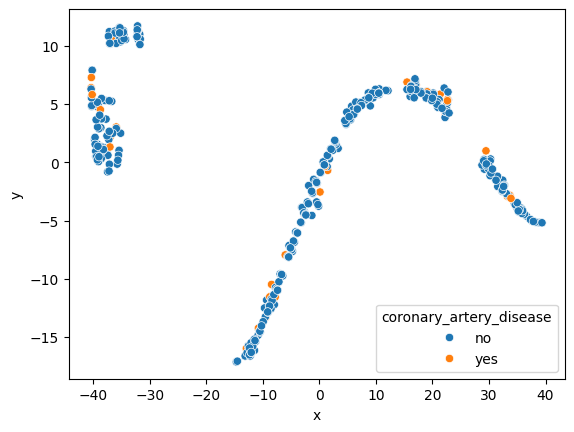

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
# Create a boolean mask for categorical columns
categorical_mask = (kideny.dtypes == object)

# Get list of categorical column names
categorical_columns = kideny.columns[categorical_mask].tolist()

# Drop non-numeric data
kideny_numeric = kideny.drop(categorical_columns, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(kideny_numeric)

kideny["x"]=tsne_features[:,0]
kideny["y"]=tsne_features[:,1]

sns.scatterplot(x="x",y="y",hue = "coronary_artery_disease",data=kideny)
plt.show()


In [ ]:
kideny["class"].value_counts()

# Droping

,count
class,
1,250
0,150


In [ ]:
kideny= kideny.drop(["x","y"], axis=1)
kideny.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,0,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,0,normal,notpresent,notpresent,0.0,...,38.0,6000.0,0.0,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,0.0,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [ ]:
# Create a boolean mask for categorical columns
categorical_mask = (kideny.dtypes == object)

# Get list of categorical column names
categorical_columns = kideny.columns[categorical_mask].tolist()

kideny_numeric =kideny.drop(categorical_columns, axis=1)
print(kideny_numeric.head())

    age  blood_pressure  specific_gravity  albumin  sugar  \
0  48.0            80.0             1.020      1.0    0.0   
1   7.0            50.0             1.020      4.0    0.0   
2  62.0            80.0             1.010      2.0    3.0   
3  48.0            70.0             1.005      4.0    0.0   
4  51.0            80.0             1.010      2.0    0.0   

   blood_glucose_random  blood_urea  serum_creatinine  sodium  potassium  \
0                 121.0        36.0               1.2     0.0        0.0   
1                   0.0        18.0               0.8     0.0        0.0   
2                 423.0        53.0               1.8     0.0        0.0   
3                 117.0        56.0               3.8   111.0        2.5   
4                 106.0        26.0               1.4     0.0        0.0   

   haemoglobin  packed_cell_volume  white_blood_cell_count  \
0         15.4                44.0                  7800.0   
1         11.3                38.0                  

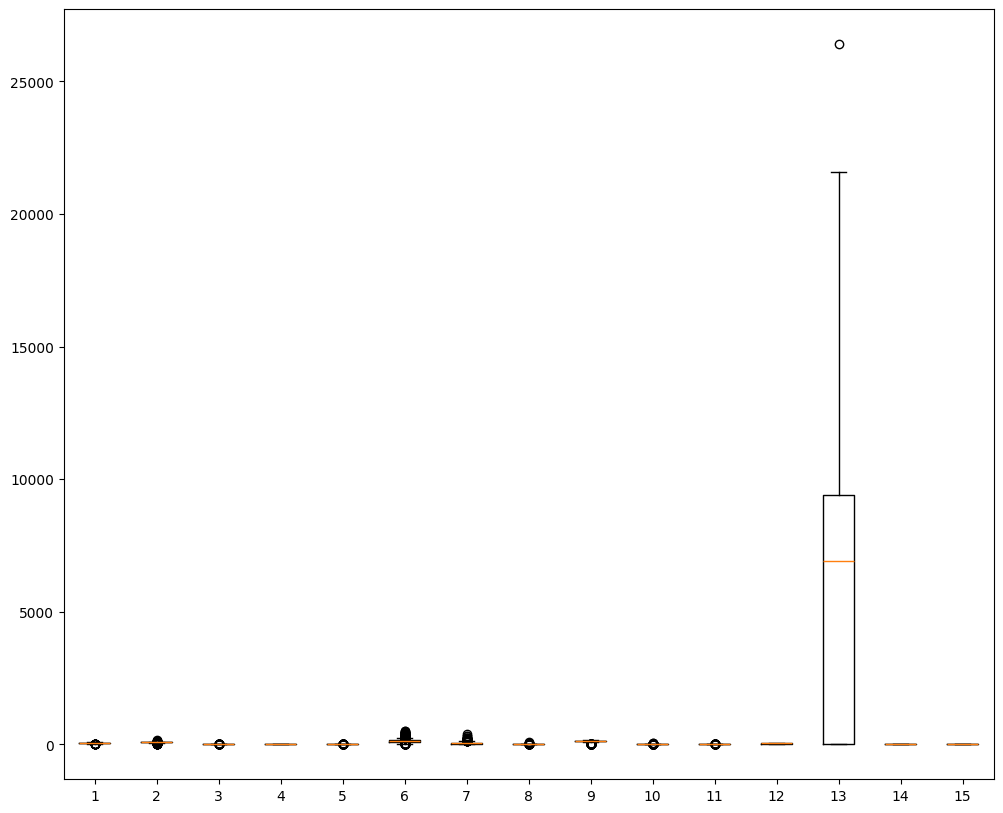

In [ ]:
fig = plt.figure(figsize =(12, 10))

# Creating plot
plt.boxplot(kideny_numeric)

# show plot
plt.show()

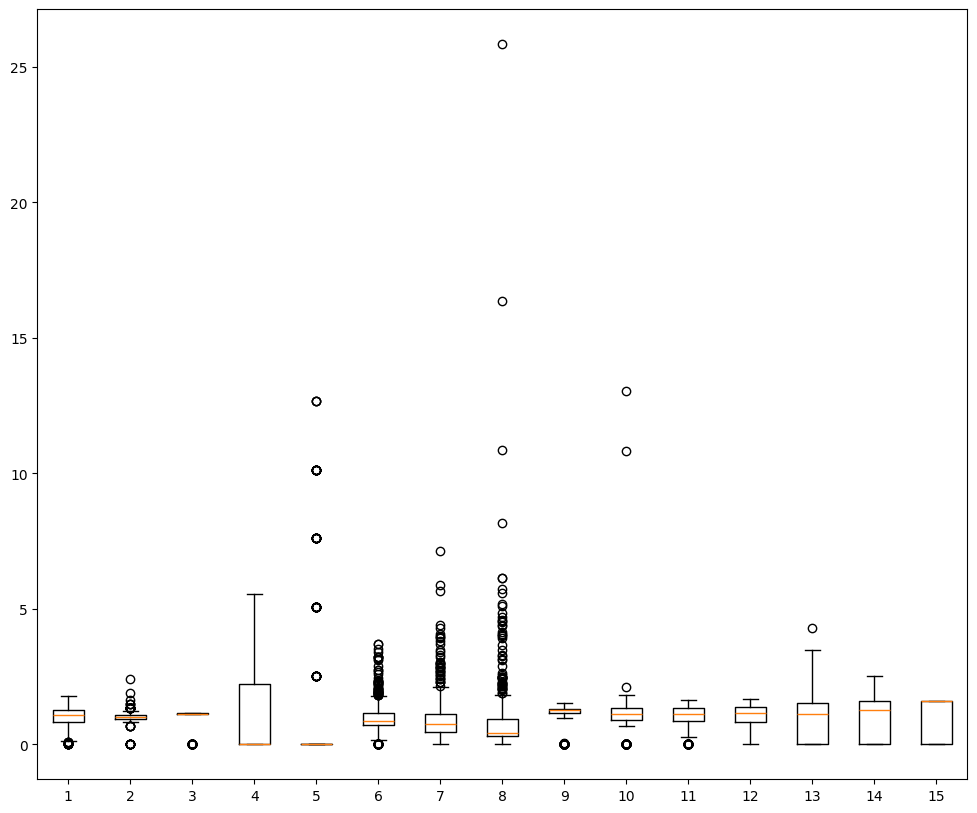

age                       0.136851
blood_pressure            0.064014
specific_gravity          0.133514
albumin                   2.128779
sugar                     6.932730
blood_glucose_random      0.446074
blood_urea                0.861893
serum_creatinine          3.690662
sodium                    0.285967
potassium                 0.893134
haemoglobin               0.211918
packed_cell_volume        0.281300
white_blood_cell_count    0.528228
red_blood_cell_count      0.558667
class                     0.601504
dtype: float64


In [ ]:
# Normalize the data
normalized_kideny = kideny_numeric/kideny_numeric.mean()

fig = plt.figure(figsize =(12, 10))

# Creating plot
plt.boxplot(normalized_kideny)

# show plot
plt.show()

print(normalized_kideny.var())

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.1)

# Fit the selector to normalized head_df
sel.fit(normalized_kideny)

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced DataFrame
reduced_kideny = kideny_numeric.loc[:, mask]

print(f"Dimensionality reduced from {kideny_numeric.shape[1]} to {reduced_kideny.shape[1]}.")

print(reduced_kideny.shape)
print(reduced_kideny.info())


Dimensionality reduced from 15 to 14.
(400, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     400 non-null    float64
 1   specific_gravity        400 non-null    float64
 2   albumin                 400 non-null    float64
 3   sugar                   400 non-null    float64
 4   blood_glucose_random    400 non-null    float64
 5   blood_urea              400 non-null    float64
 6   serum_creatinine        400 non-null    float64
 7   sodium                  400 non-null    float64
 8   potassium               400 non-null    float64
 9   haemoglobin             400 non-null    float64
 10  packed_cell_volume      400 non-null    float64
 11  white_blood_cell_count  400 non-null    float64
 12  red_blood_cell_count    400 non-null    float64
 13  class                   400 non-null    int64  

In [ ]:
kideny = pd.get_dummies(kideny)

In [ ]:
kideny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          400 non-null    float64
 1   blood_pressure               400 non-null    float64
 2   specific_gravity             400 non-null    float64
 3   albumin                      400 non-null    float64
 4   sugar                        400 non-null    float64
 5   blood_glucose_random         400 non-null    float64
 6   blood_urea                   400 non-null    float64
 7   serum_creatinine             400 non-null    float64
 8   sodium                       400 non-null    float64
 9   potassium                    400 non-null    float64
 10  haemoglobin                  400 non-null    float64
 11  packed_cell_volume           400 non-null    float64
 12  white_blood_cell_count       400 non-null    float64
 13  red_blood_cell_count

In [ ]:
X = kideny.drop(["class","blood_pressure"],axis=1)
y = kideny["class"]

In [ ]:
#Import train_test_split and stratify the data using y
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# Use stratified sampling to split up the dataset according to the y dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

scaler =StandardScaler()
knn = KNeighborsClassifier()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled,y_train)
ypred =knn.predict(X_test_scaled)

knn.score(X_test_scaled,y_test)

0.97